## 1. Take 10 images in different orientation of 10 different persons. So total you will have 10 x 10 = 100 images (dataset)

## 2. Take two test images of 10 person. In test data you will have 20 images

## 3. Match the test image with dataset images using SIFT and find the accuracy.

### Note : To match SIFT features, you can use Euclidean Distance

# Code:-

## Importing Libraries

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Defining required Classes and Function

In [69]:
def get_features(sift, gray):
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    #print(keypoints)
    return (keypoints, descriptors)

In [70]:
def match_features(test_descriptor, dataset_descriptor):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(test_descriptor, dataset_descriptor, k=2)
    good = []
    for m, n in matches:
        if m.distance < 0.9*n.distance:
            good.append(m)
    return good

## Creating the Dataset

In [71]:
#Names = ['ks','vk','cbn','chad','rdj','pv','j','jb','ntr','r','zk','rt','apj','sp']
Names = ['ks','vk','cbn','chad','rdj','pv','j','jb','ntr','r']


In [72]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [73]:
dataset_images = []
iImages=[]
for name in Names:
    for i in range(1,11):
        image = cv2.imread('/Users/LakshmiSrinivas/Desktop/CV/Assignment5/ML_Proj/'+name+'/'+name+str(i)+'.jpg')
        ColorImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        gray1 = cv2.cvtColor(ColorImg, cv2.COLOR_RGB2GRAY)
        arr1=np.array(ColorImg)
        iImages.append(arr1)
        faces = face_cascade.detectMultiScale(image,1.1, 5)
        (x1,y1,w1,h1)=faces[0]
        t=0
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = ColorImg[y:y+h, x:x+w]
            roi_color = image[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            
            for (ex,ey,ew,eh) in eyes:
                
                t=t+1
                X,Y,W,H = x,y,w,h
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        if(t!=0):
            cropped_image = ColorImg[Y:Y+H,X:X+W]
        else:
            cropped_image = ColorImg[y1:y1+h1,x1:x1+w1]
        stretch_near = cv2.resize(cropped_image, (64, 64),interpolation = cv2.INTER_LINEAR)
        gray = cv2.cvtColor(stretch_near, cv2.COLOR_RGB2GRAY)
        arr = np.array(gray)
        dataset_images.append(arr)

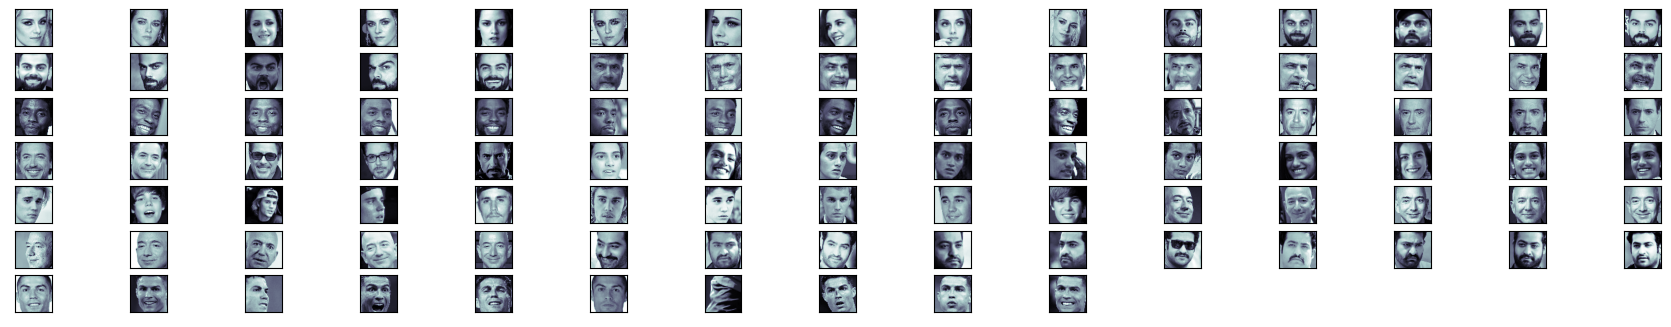

In [74]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(22,12))
# plot several images
for i in range(100):
    ax = fig.add_subplot(21, 15, i + 1, xticks=[], yticks=[])
    ax.imshow(dataset_images[i], cmap=plt.cm.bone)

### 1. Load the Images

In [75]:
#dataset_images = []
#for name in Names:
#    for i in range(1,11):
#        dataset_images.append(cv2.imread('/Users/LakshmiSrinivas/Desktop/CV/Assignment5/ML_Proj/'+name+'/'+name+str(i)+'.jpg'))

### 2. Create test images and train images

In [76]:
test_images = []
train_images = []
i = 0
for img in dataset_images:
    i += 1
    if (i%10 == 1) or (i%10 == 2):
        test_images.append(img)
    else:
        train_images.append(img)

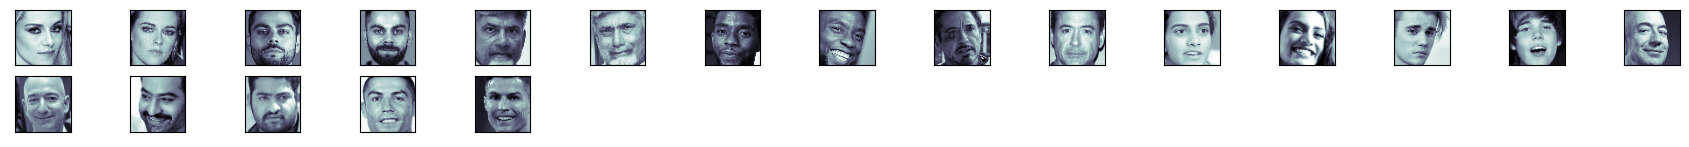

In [77]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(22,12))
# plot several images
for i in range(20):
    ax = fig.add_subplot(14, 15, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[i], cmap=plt.cm.bone)

In [78]:
print(len(dataset_images))

100


## Create a SIFT detector

In [79]:
sift = cv2.SIFT_create()

## Performing the Matching

In [80]:
dataset_features = []
for img in train_images:
    dataset_features.append(get_features(sift, img))

In [81]:
test_features = []
for img in test_images:
    test_features.append(get_features(sift, img))

In [82]:
total_matches = 0


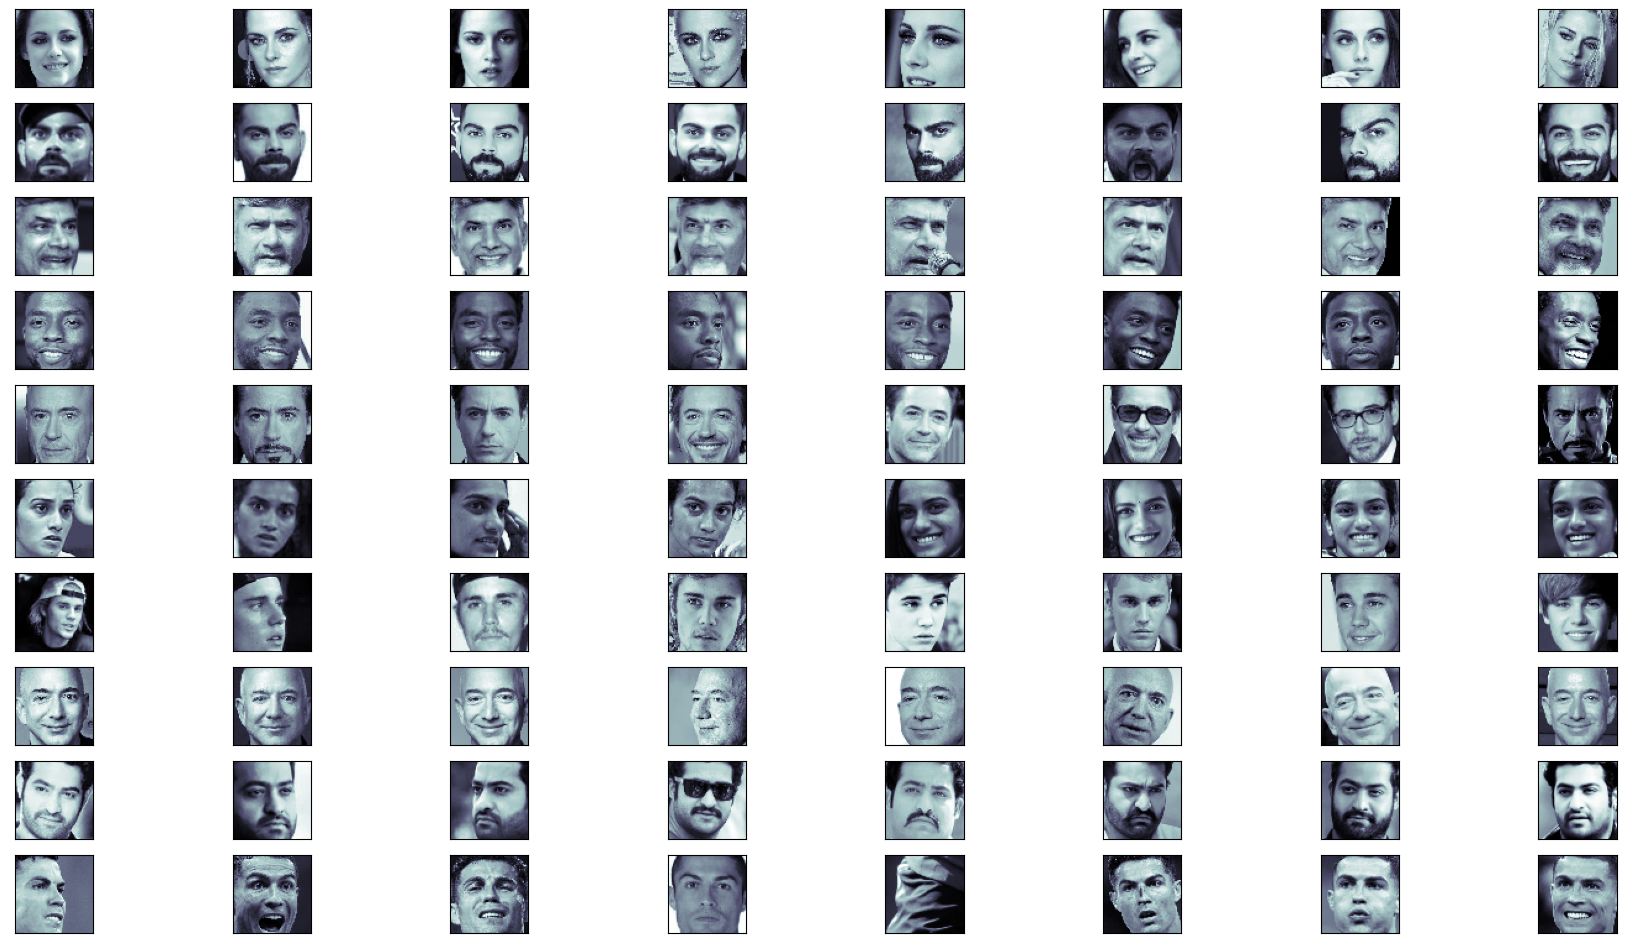

In [83]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(22,12))
# plot several images
for i in range(80):
    ax = fig.add_subplot(10, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(train_images[i], cmap=plt.cm.bone)

In [84]:
correct_matches = 0
for i in range(len(test_images)):
    best_matches = []
    for j in range(len(train_images)):
        matches = match_features(test_features[i][1], dataset_features[j][1])
        best_matches.append(len(matches))
    #print(len(best_matches))
    best_match_idx = np.argmax(best_matches)
    #print(best_match_idx)
    if best_match_idx // 8 == i // 2:
        #print("i",i)
        correct_matches += 1

## Accuracy

In [85]:
accuracy = (correct_matches / len(test_images)) * 100
print(f'Accuracy: {accuracy}%')

Accuracy: 50.0%
